In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def plot_noisiness_performance(metric, analysis_type, has_random=True): #analysis_type = missingness or noisiness
    metric_dict = metrics_dict[metric]
    df= pd.DataFrame()
    if analysis_type == 'noisiness':
         df[analysis_type] = [0, 2, 4, 6]
    elif analysis_type == 'missingness':
        df[analysis_type] = [0, 1, 2, 3]
    else:
        print('Unknown analysis type')
        return
    if has_random:
        df['random agent'] = metric_dict['random agent']
    df['dt agent'] = metric_dict['dt agent']
    df['dqn agent'] = metric_dict['dqn agent']
    if metric not in ['episode_length', 'episode_reward']:
        df['decision tree'] = metric_dict['plain_dt']
    
    plt.title(metric)
    plt.ylabel(metric)
    sns.lineplot(x=analysis_type, y='value', hue='variable', 
             data=pd.melt(df, [analysis_type]))
    

#### Noisiness 

In [3]:
#noisiness = [0, 2, 4, 6]
success_rate = {'random agent': [11.807, 12.129, 11.679, 12.429], 'plain_dt': [99.964, 75.229, 70.164, 65.964], 'dt agent': [100, 83.650, 76.021, 69.700], 'dqn agent': [95.250, 80.179, 73.229, 66.343]}
episode_length = {'random agent': [1.540, 1.540, 1.540, 1.540], 'dt agent': [4.007, 4.005, 4.007, 3.999], 'dqn agent': [5.260, 4.447, 4.409, 4.140]}
episode_reward = {'random agent': [-0.771, -0.762, -0.772, -0.758], 'dt agent': [1, 0.673, 0.520, 0.394], 'dqn agent': [0.765, 0.478, 0.339, 0.201]}
acc = {'random agent': [0.118, 0.121, 0.117, 0.124], 'plain_dt': [0.9996, 0.752, 0.702, 0.660], 'dt agent': [1, 0.837, 0.760, 0.697], 'dqn agent': [0.953, 0.802, 0.732, 0.663]}
f1 = {'random agent': [0.118, 0.119, 0.115, 0.123], 'plain_dt': [0.9996, 0.752, 0.702, 0.654], 'dt agent': [1, 0.837, 0.757, 0.691], 'dqn agent': [0.948, 0.803, 0.732, 0.663]}
roc_auc = {'random agent': [0.498, 0.499, 0.498, 0.503], 'plain_dt': [0.9998, 0.861, 0.827, 0.801], 'dt agent': [1, 0.924, 0.878, 0.839], 'dqn agent': [0.975, 0.905, 0.862, 0.819, ]}
metrics_dict = {'success_rate':success_rate, 'episode_length':episode_length, 'episode_reward':episode_reward, 'acc':acc, 'f1':f1, 'roc_auc':roc_auc}

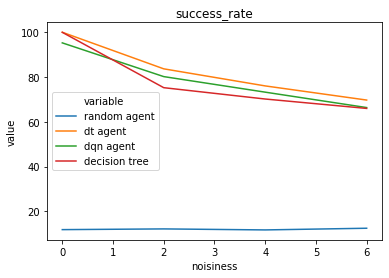

In [4]:
plot_noisiness_performance('success_rate', 'noisiness')    

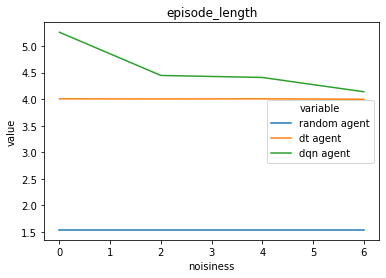

In [5]:
plot_noisiness_performance('episode_length', 'noisiness')

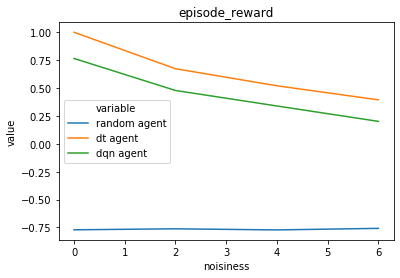

In [6]:
plot_noisiness_performance('episode_reward', 'noisiness')

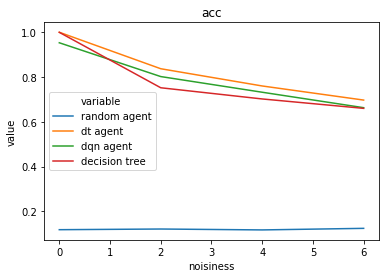

In [7]:
plot_noisiness_performance('acc', 'noisiness')

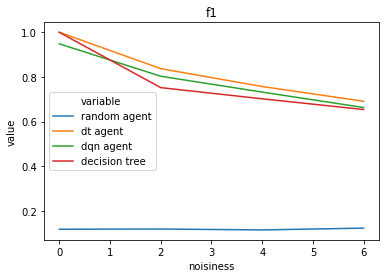

In [8]:
plot_noisiness_performance('f1', 'noisiness')

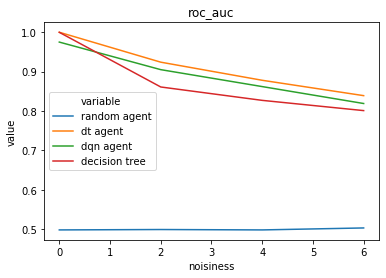

In [9]:
plot_noisiness_performance('roc_auc', 'noisiness')

#### Noisiness without inconclusive diagnosis

In [10]:
#noisiness_sans_inconc = [0, 2, 4, 6]
success_rate = {'plain_dt': [99.969, 75.893, 71.156, 66.946], 'dt agent': [100, 82.532, 74.411, 67.633], 'dqn agent': [94.965, 78.930, 71.469, 64.123]}
episode_length = {'dt agent': [3.981, 3.981, 3.985, 3.976], 'dqn agent': [5.191, 4.437, 4.425, 4.140]}
episode_reward = {'dt agent': [1, 0.651, 0.488, 0.353], 'dqn agent': [0.899, 0.579, 0.429, 0.282]}
metrics_dict = {'success_rate':success_rate, 'episode_length':episode_length, 'episode_reward':episode_reward}

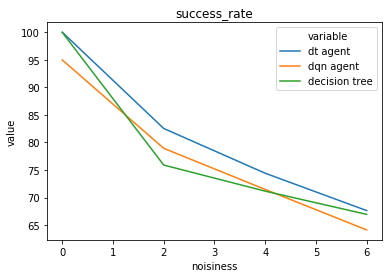

In [11]:
plot_noisiness_performance('success_rate', 'noisiness', False)    

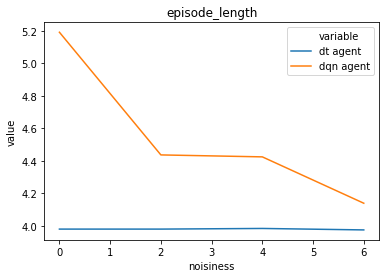

In [12]:
plot_noisiness_performance('episode_length', 'noisiness', False)

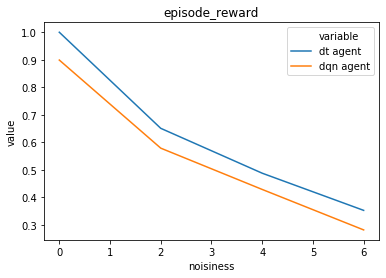

In [13]:
plot_noisiness_performance('episode_reward', 'noisiness', False)

#### Missingness

In [14]:
#missingness = [0, 1, 2, 3]
success_rate = {'random agent': [11.807, 11.807, 11.807, 11.807], 'plain_dt': [99.964, 90.721, 84.114, 77.707], 'dt agent': [100, 86.029, 73.664, 61.971], 'dqn agent': [95.250, 82.014, 69.107, 57.750]}
episode_length = {'random agent': [1.540, 1.540, 1.540, 1.540], 'dt agent': [4.007, 3.916, 3.832, 3.737], 'dqn agent': [5.260, 3.851, 3.725, 3.982]}
episode_reward = {'random agent': [-0.771, -0.771, -0.771, -0.771,], 'dt agent': [1, 0.721, 0.473, 0.239], 'dqn agent': [0.765, 0.500, 0.243, 0.015]}
acc = {'random agent': [0.118, 0.118, 0.118, 0.118], 'plain_dt':[0.9996, 0.907, 0.841, 0.777], 'dt agent': [1, 0.860, 0.737, 0.620], 'dqn agent': [0.953, 0.820, 0.691, 0.578]}
f1 = {'random agent': [0.118, 0.118, 0.118, 0.118], 'plain_dt':[0.9996, 0.885, 0.812, 0.746], 'dt agent': [1, 0.864, 0.767, 0.669], 'dqn agent': [0.948, 0.831, 0.727, 0.628]}
roc_auc = {'random agent': [0.498, 0.498, 0.498, 0.498], 'plain_dt': [0.9996, 0.936, 0.894, 0.857], 'dt agent': [1, 0.924, 0.856, 0.793], 'dqn agent': [0.975, 0.902, 0.832, 0.770]}
metrics_dict = {'success_rate':success_rate, 'plain_dt': [0.9998], 'episode_length':episode_length, 'episode_reward':episode_reward, 'acc':acc, 'f1':f1, 'roc_auc':roc_auc}

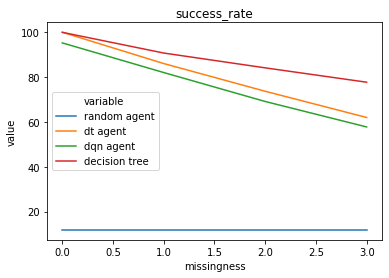

In [15]:
plot_noisiness_performance('success_rate', 'missingness')    

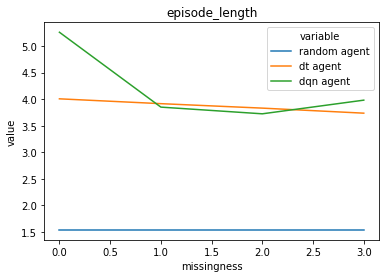

In [16]:
plot_noisiness_performance('episode_length', 'missingness')

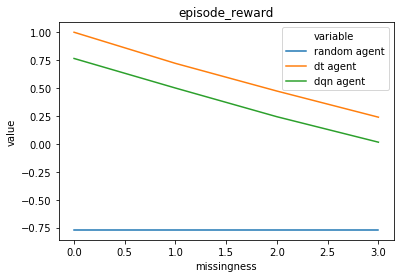

In [17]:
plot_noisiness_performance('episode_reward', 'missingness')

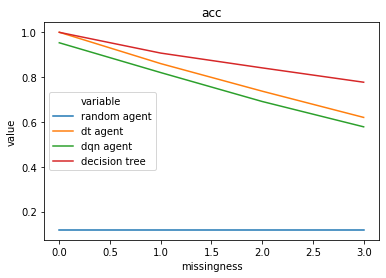

In [18]:
plot_noisiness_performance('acc', 'missingness')

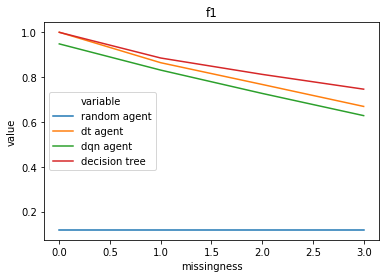

In [19]:
plot_noisiness_performance('f1', 'missingness')

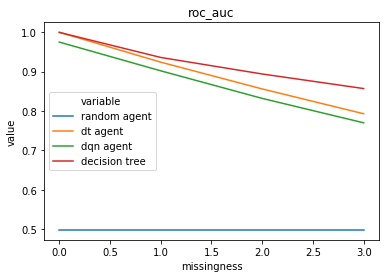

In [20]:
plot_noisiness_performance('roc_auc', 'missingness')

#### Missingness without inconclusive diagnosis

In [21]:
#missingness_sans_inconc = [0, 1, 2, 3]
success_rate = {'plain_dt': [99.969, 93.444, 87.686, 81.460], 'dt agent': [100, 84.965, 71.660, 59.078], 'dqn agent': [94.965, 80.730, 66.887, 54.619]}
episode_length = {'dt agent': [3.981, 3.893, 3.811, 3.719], 'dqn agent': [5.191, 3.835, 3.709, 3.969]}
episode_reward = {'dt agent': [1, 0.699, 0.433, 0.182], 'dqn agent': [0.899, 0.615, 0.338, 0.092]}
metrics_dict = {'success_rate':success_rate, 'episode_length':episode_length, 'episode_reward':episode_reward}

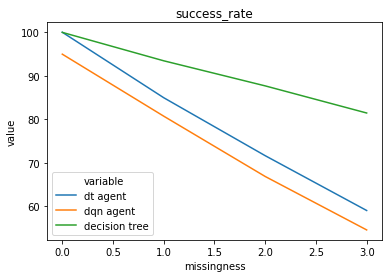

In [22]:
plot_noisiness_performance('success_rate', 'missingness', False)    

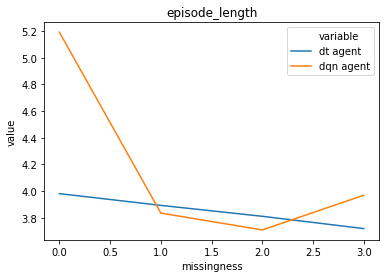

In [23]:
plot_noisiness_performance('episode_length', 'missingness', False)

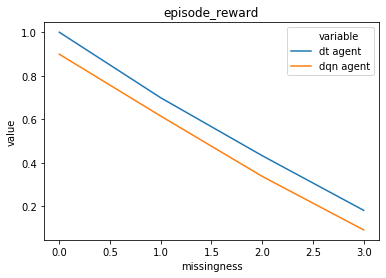

In [24]:
plot_noisiness_performance('episode_reward', 'missingness', False)

#### Plotting success rate

In [25]:
# metric ='success_rate'
# df = pd.DataFrame()
# df['missingness'] = [0, 1, 2, 3]
# df['random agent'] = success_rate['random agent']
# df['dt agent'] = success_rate['dt agent']
# df['dqn agent'] = success_rate['dqn agent']
# df.head()

#### Success Rate

In [26]:
plot_noisiness_performance('success_rate')

TypeError: plot_noisiness_performance() missing 1 required positional argument: 'analysis_type'

#### Episode length

In [ ]:
plot_noisiness_performance('episode_length')

#### Episode reward

In [ ]:
plot_noisiness_performance('episode_reward')

#### Accuracy

In [ ]:
plot_noisiness_performance('acc')

#### F1

In [ ]:
plot_noisiness_performance('f1')

#### ROC-AUC 

In [ ]:
plot_noisiness_performance('roc_auc')